## Text Mining Case 2
a. Aplikasi yang dibuat harus memanfaatkan sejumlah teknik pemrosesan teks, termasuk 
model bahasa atau language modelling (n-gram) ✅, word embedding dengan 
menggunakan metode Word2Vec atau GloVe ✅, grammar parsing dengan 
menggunakan Natural Language ToolKit (NLTK) ✅, dependency parsing dengan 
menggunakan SpaCy ✅, dan mengimplementasikan Named Entity Recognition (NER).


b. Dalam bagian grammar parsing menggunakan NLTK, aplikasi harus dapat 
menampilkan grammar parsing tree dari Context Free Grammar (CFG) yang telah 
dikonstruksi dengan kalimat yang sudah dibuat sebelumnya. Selain itu, CFG yang 
dibuat harus memenuhi persyaratan umum, dan Anda harus dapat menjelaskan CFG 
yang telah Anda buat secara rinci dan jelas. ✅


c. Pada bagian Named Entity Recognition (NER), Anda diminta untuk menampilkan 
Named Entities dari data yang telah diolah sebelumnya. Ilustrasi dapat dilihat di 
bawah ini

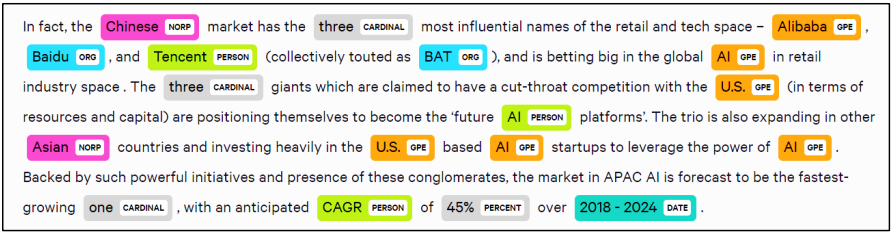

In [1]:
# N Gram Language Modelling
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

class NGramLanguageModel:
    def __init__(self, n) -> None:
        self.n = n
        self.vectorizer = CountVectorizer(analyzer='word', ngram_range=(n, n))
    
    def fit_transform(self, corpus):
        return self.vectorizer.fit_transform(corpus)
    
    def transform(self, corpus):
        return self.vectorizer.transform(corpus)
    
def calculate_cosine_similarity(matrix, query_v):
    return cosine_similarity(query_v, matrix)


In [2]:
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize

corpus = sent_tokenize(gutenberg.raw("chesterton-brown.txt").replace('\n', ' '))
query = "I want to create a tropical and expensive potion with love and sort of honour, and I want the ability to fly with abandoned house"

N = 1
DOCUMENT_INDEX = 0

ngram_model = NGramLanguageModel(N)

matrix = ngram_model.fit_transform(corpus)
query_v = ngram_model.transform([query])

print(f"{N}-Gram Model: ")
data = matrix.A

print(pd.DataFrame(matrix.A, columns=ngram_model.vectorizer.get_feature_names_out()))
print(query_v.A)


1-Gram Model: 
      1914  379  abandoned  abbreviations  abide  abilities  abject  able  \
0        1    0          0              0      0          0       0     0   
1        0    0          0              0      0          0       0     0   
2        0    0          0              0      0          0       0     0   
3        0    0          0              0      0          0       0     0   
4        0    0          0              0      0          0       0     0   
...    ...  ...        ...            ...    ...        ...     ...   ...   
3707     0    0          0              0      0          0       0     0   
3708     0    0          0              0      0          0       0     0   
3709     0    0          0              0      0          0       0     0   
3710     0    0          0              0      0          0       0     0   
3711     0    0          0              0      0          0       0     0   

      abnormal  abnormality  ...  you  young  younger  your 

In [3]:
gutenberg.raw("chesterton-brown.txt").replace('\n', ' ')

'[The Wisdom of Father Brown by G. K. Chesterton 1914]   I. The Absence of Mr Glass   THE consulting-rooms of Dr Orion Hood, the eminent criminologist and specialist in certain moral disorders, lay along the sea-front at Scarborough, in a series of very large and well-lighted french windows, which showed the North Sea like one endless outer wall of blue-green marble. In such a place the sea had something of the monotony of a blue-green dado: for the chambers themselves were ruled throughout by a terrible tidiness not unlike the terrible tidiness of the sea.  It must not be supposed that Dr Hood\'s apartments excluded luxury, or even poetry. These things were there, in their place; but one felt that they were never allowed out of their place.  Luxury was there: there stood upon a special table eight or ten boxes of the best cigars; but they were built upon a plan so that the strongest were always nearest the wall and the mildest nearest the window.  A tantalus containing three kinds of 

In [4]:
similarities = [s[0] for s in cosine_similarity(matrix, query_v)]
data = {'Document': corpus, 'Similarity': similarities}
df = pd.DataFrame(data)

print(query)
df

I want to create a tropical and expensive potion with love and sort of honour, and I want the ability to fly with abandoned house


,Document,Similarity
0,[The Wisdom of Father Brown by G. K. Chesterto...,0.127000
1,The Absence of Mr Glass THE consulting-rooms...,0.283981
2,In such a place the sea had something of the m...,0.179605
3,It must not be supposed that Dr Hood's apartme...,0.000000
4,"These things were there, in their place; but o...",0.035921
...,...,...
3707,"""Where are you going?""",0.000000
3708,asked his friend.,0.000000
3709,"""I'm going to have another look at that portra...",0.211341
3710,"""I wonder what part--I wonder if a man is less...",0.000000


In [5]:
# Word Embeddings
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import gensim
import string
import warnings
import re

warnings.filterwarnings(action='ignore')

dataset = []
for sent in corpus:
    words_in_sentence = []
    for word in word_tokenize(sent):
        if word in stopwords.words('english'):
            continue
        if word in string.punctuation:
            continue
        if word == "":
            continue
        word = re.sub(r"[^a-zA-Z0-9\s/.]", '', word)
        words_in_sentence.append(word.lower())
    dataset.append(words_in_sentence)   
print(dataset)

model = gensim.models.Word2Vec(dataset, min_count=1, vector_size=1000, window=5)
print("Cosine similarity between 'brown' " +
      "and 'french' Using CBOW : ", model.wv.similarity('brown', 'french'))

[['the', 'wisdom', 'father', 'brown', 'g.', 'k.', 'chesterton', '1914', 'i'], ['the', 'absence', 'mr', 'glass', 'the', 'consultingrooms', 'dr', 'orion', 'hood', 'eminent', 'criminologist', 'specialist', 'certain', 'moral', 'disorders', 'lay', 'along', 'seafront', 'scarborough', 'series', 'large', 'welllighted', 'french', 'windows', 'showed', 'north', 'sea', 'like', 'one', 'endless', 'outer', 'wall', 'bluegreen', 'marble'], ['in', 'place', 'sea', 'something', 'monotony', 'bluegreen', 'dado', 'chambers', 'ruled', 'throughout', 'terrible', 'tidiness', 'unlike', 'terrible', 'tidiness', 'sea'], ['it', 'must', 'supposed', 'dr', 'hood', 's', 'apartments', 'excluded', 'luxury', 'even', 'poetry'], ['these', 'things', 'place', 'one', 'felt', 'never', 'allowed', 'place'], ['luxury', 'stood', 'upon', 'special', 'table', 'eight', 'ten', 'boxes', 'best', 'cigars', 'built', 'upon', 'plan', 'strongest', 'always', 'nearest', 'wall', 'mildest', 'nearest', 'window'], ['a', 'tantalus', 'containing', 'thre

In [98]:
# Grammar parsing
import nltk
from nltk import CFG
from nltk.parse import ChartParser
import contractions

def extract_information(parse_tree):
    for subtree in parse_tree.subtrees():
        if subtree.label() == 'NP':
            print(f"Found a noun phrase: ({' '.join(subtree.leaves())})")
        elif subtree.label() == 'VP':
            print(f"Found a verb phrase: ({' '.join(subtree.leaves())})")

def demonstrate_nlp_parsing(sentence, grammar):
    words = nltk.word_tokenize(sentence)
    words = [w for w in words if w not in string.punctuation]
    parser = ChartParser(grammar)
    
    try:
        parses = list(parser.parse(words))
        if parses:
            parse_tree = parses[0]
            print("Parse Tree: ")
            print(parse_tree)
            
            for tree in parser.parse(sentence.split()):
                print(tree, '\n')
                tree.pretty_print()
                
            print("Extracted Information")
            extract_information(parse_tree)
        else:
            print("No parses found")
            
    except ValueError as e:
        print(f"Error during parsing: {e}")
        
nlp_grammar = CFG.fromstring("""
S -> NP VP | VP
VP -> MD VB | VB | VB NP | VB NP PP | VP CC VP |  VP CC NP VP
PP -> P NP
NP -> NN | PN | 'him' | 'myself' | 'i' | 'you' | 'me'
P -> 'over' | 'to' | 'with' | 'and'
VB -> 'try' | 'send' | 'answer' | 'deal' | 'meet' | 'want'
MD -> 'will' | 'not' | 'can'
CC -> 'and' | 'but' | 'when'
""")

nlp_sentences = corpus[695:699]
nlp_sentences = [
        "i answer you",
        "i want him but meet you",
        "i will answer when i want myself",
        "i try and try but you send him over me"]
nlp_sentences = [s.lower() for s in nlp_sentences]
nlp_sentences = [s.replace('\\', '').replace("'s", "") for s in nlp_sentences]
nlp_sentences = [contractions.fix(s) for s in nlp_sentences]


for i, sentence in enumerate(nlp_sentences):
    print(f"Sentence {i+1}: {nlp_sentences[i]}")
    demonstrate_nlp_parsing(sentence, nlp_grammar)
    print("\n")

Sentence 1: i answer you
Parse Tree: 
(S (NP i) (VP (VB answer) (NP you)))
(S (NP i) (VP (VB answer) (NP you))) 

      S           
  ____|_____       
 |          VP    
 |     _____|___   
 NP   VB        NP
 |    |         |  
 i  answer     you

Extracted Information
Found a noun phrase: (i)
Found a verb phrase: (answer you)
Found a noun phrase: (you)


Sentence 2: i want him but meet you
Parse Tree: 
(S
  (NP i)
  (VP (VP (VB want) (NP him)) (CC but) (VP (VB meet) (NP you))))
(S
  (NP i)
  (VP (VP (VB want) (NP him)) (CC but) (VP (VB meet) (NP you)))) 

              S                  
  ____________|___                
 |                VP             
 |         _______|________       
 |        VP      |        VP    
 |    ____|___    |    ____|___   
 NP  VB       NP  CC  VB       NP
 |   |        |   |   |        |  
 i  want     him but meet     you

Extracted Information
Found a noun phrase: (i)
Found a verb phrase: (want him but meet you)
Found a verb phrase: (want him)

Penjelasan:

- S -> Sentence 
- VP -> Verb Phrase
- NP -> Noun Phrase
- PP -> Prepositional Phrase
- P -> Preposition
- VB -> Single Verb
- MD -> Modal
- CC -> Coordinating Conjunction

Parsing tree dibuat untuk melihat apakah sentence yang diberikan sesuai dengan grammar rules yang dibuat karena grammar memiliki rulenya tersendiri.

In [106]:
# Dependency parsing with spacy
import spacy

def extract_named_entities_and_parse_tree(sentence: string):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    
    print("Formatted Dependency Parse Tree: ")
    for token in doc:
        print(f"{token.text} --{token.dep_}--> {token.head.text} ({token.pos_})")
        
        
spacy_sentence = corpus[4]
named_entities = extract_named_entities_and_parse_tree(spacy_sentence)

Formatted Dependency Parse Tree: 
These --det--> things (DET)
things --nsubj--> were (NOUN)
were --ROOT--> were (AUX)
there --advmod--> were (ADV)
, --punct--> were (PUNCT)
in --prep--> were (ADP)
their --poss--> place (PRON)
place --pobj--> in (NOUN)
; --punct--> were (PUNCT)
but --cc--> were (CCONJ)
one --nsubj--> felt (NUM)
felt --conj--> were (VERB)
that --mark--> allowed (SCONJ)
they --nsubjpass--> allowed (PRON)
were --auxpass--> allowed (AUX)
never --neg--> allowed (ADV)
allowed --ccomp--> felt (VERB)
out --prep--> allowed (ADP)
of --prep--> out (ADP)
their --poss--> place (PRON)
place --pobj--> of (NOUN)
. --punct--> felt (PUNCT)


In [113]:
import spacy
ner_sentences = " ".join(corpus[:3])

nlp = spacy.load("en_core_web_sm")

doc = nlp(ner_sentences)
categories = {}

for ent in doc.ents:
    label = ent.label_
    if label not in categories:
        categories[label] = []
    categories[label].append(ent.text)
    
print("Categories Named Entities: ")
for label, entities in categories.items():
    print(f"{label}: {', '.join(entities)}")

Categories Named Entities: 
PERSON: Brown, G. K. Chesterton
ORG: I. The Absence of Mr Glass, Dr Orion Hood
GPE: Scarborough
NORP: french
LOC: the North Sea
CARDINAL: one
